In [2]:
import glob
import pandas as pd
import seaborn as sns

In [4]:
!python3 bidirec_script.py '../SPREAD_food_networks/np/networks/apr1_app1_b2_k500/1.edges' 0 1 3 ',' 1 12 out_np_new_delta_1.csv
!python3 bidirec_script.py '../SPREAD_food_networks/np/networks/apr1_app1_b2_k500/1.edges' 0 1 3 ',' 2 12 out_np_new_delta_2.csv
!python3 bidirec_script.py '../SPREAD_food_networks/np/networks/apr1_app1_b2_k500/1.edges' 0 1 3 ',' 3 12 out_np_new_delta_3.csv
!python3 bidirec_script.py '../SPREAD_food_networks/np/networks/apr1_app1_b2_k500/1.edges' 0 1 3 ',' 4 12 out_np_new_delta_4.csv
!python3 bidirec_script.py '../SPREAD_food_networks/np/networks/apr1_app1_b2_k500/1.edges' 0 1 3 ',' 5 12 out_np_new_delta_5.csv
!python3 bidirec_script.py '../SPREAD_food_networks/np/networks/apr1_app1_b2_k500/1.edges' 0 1 3 ',' 6 12 out_np_new_delta_6.csv
!python3 bidirec_script.py '../SPREAD_food_networks/np/networks/apr1_app1_b2_k500/1.edges' 0 1 3 ',' 7 12 out_np_new_delta_7.csv
!python3 bidirec_script.py '../SPREAD_food_networks/np/networks/apr1_app1_b2_k500/1.edges' 0 1 3 ',' 8 12 out_np_new_delta_8.csv
!python3 bidirec_script.py '../SPREAD_food_networks/np/networks/apr1_app1_b2_k500/1.edges' 0 1 3 ',' 9 12 out_np_new_delta_9.csv
!python3 bidirec_script.py '../SPREAD_food_networks/np/networks/apr1_app1_b2_k500/1.edges' 0 1 3 ',' 10 12 out_np_new_delta_10.csv
!python3 bidirec_script.py '../SPREAD_food_networks/np/networks/apr1_app1_b2_k500/1.edges' 0 1 3 ',' 11 12 out_np_new_delta_11.csv
!python3 bidirec_script.py '../SPREAD_food_networks/np/networks/apr1_app1_b2_k500/1.edges' 0 1 3 ',' 12 12 out_np_new_delta_12.csv

In [5]:
graphnp_d_1 = pd.read_csv('out_np_new_delta_1.csv')
graphnp_d_2 = pd.read_csv('out_np_new_delta_2.csv')
graphnp_d_3 = pd.read_csv('out_np_new_delta_3.csv')
graphnp_d_4 = pd.read_csv('out_np_new_delta_4.csv')
graphnp_d_5 = pd.read_csv('out_np_new_delta_5.csv')
graphnp_d_6 = pd.read_csv('out_np_new_delta_6.csv')
graphnp_d_7 = pd.read_csv('out_np_new_delta_7.csv')
graphnp_d_8 = pd.read_csv('out_np_new_delta_8.csv')
graphnp_d_9 = pd.read_csv('out_np_new_delta_9.csv')
graphnp_d_10 = pd.read_csv('out_np_new_delta_10.csv')
graphnp_d_11 = pd.read_csv('out_np_new_delta_11.csv')
graphnp_d_12 = pd.read_csv('out_np_new_delta_12.csv')

In [6]:
g = pd.concat([graphnp_d_1, graphnp_d_2, graphnp_d_3, graphnp_d_4, graphnp_d_5, graphnp_d_6, graphnp_d_7, graphnp_d_8, graphnp_d_9, graphnp_d_10, graphnp_d_11, graphnp_d_12])

<AxesSubplot:xlabel='t1', ylabel='count'>

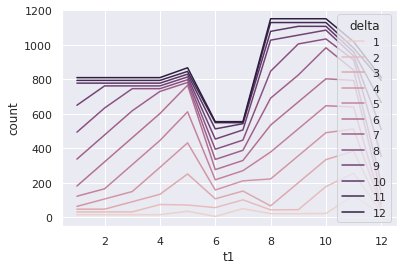

In [7]:
df=g[['t1', 'count', 'delta']].groupby(['t1', 'delta']).sum().reset_index()
sns.set(rc={'figure.figsize':(12,9)})

sns.lineplot(data=df, x='t1', y='count', hue='delta', legend='full')